# Trying to predict whether patient with given feature would have a stroke.(Class Imbalance Problem)

In [241]:
#importing library
import numpy as np
import pandas as pd
#train_test_split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
#tree based model
from sklearn.tree import DecisionTreeClassifier
#Support Vector Machine
from sklearn.svm import LinearSVC,SVC
#neural based model
from sklearn.neural_network import MLPClassifier
#ensemble method
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
#lightgbm
from lightgbm import LGBMClassifier
#catboost
from catboost import CatBoostClassifier
#for checking the accuracy of the dataset
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings(action='ignore')
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Loading the Dataset

In [242]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
#loading the dataset
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [243]:
plt.figure(figsize=(16,16))

df[['smoking_status','stroke']].value_counts()

smoking_status   stroke
never smoked     0         1802
Unknown          0         1497
formerly smoked  0          815
smokes           0          747
never smoked     1           90
formerly smoked  1           70
Unknown          1           47
smokes           1           42
dtype: int64

<Figure size 1152x1152 with 0 Axes>

* There is no correlation between smoking and stroke

In [148]:
df[['heart_disease','stroke']].value_counts()

heart_disease  stroke
0              0         4632
1              0          229
0              1          202
1              1           47
dtype: int64

* There is no corelation between heart disease and brain stroke

# Role of Work type on brain stroke

In [149]:
df[['work_type','stroke']].value_counts()

work_type      stroke
Private        0         2776
Self-employed  0          754
children       0          685
Govt_job       0          624
Private        1          149
Self-employed  1           65
Govt_job       1           33
Never_worked   0           22
children       1            2
dtype: int64

In [150]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [151]:
(819*100)/(2925+819)

21.875

In [152]:
(65*100)/(65+149)

30.373831775700936

In [153]:
(657*100)/(2925+657)

18.34170854271357

In [154]:
(33*100)/(33+149)

18.13186813186813

In [155]:
(2925*100)/(2925+819)

78.125

In [156]:
(149*100)/(65+149)

69.62616822429906

In [157]:
(2925*100)/(2925+657)

81.65829145728644

In [158]:
(149*100)/(33+149)

81.86813186813187

# * Private Employee has more chance of getting stroke than Government Employees
# * Self Employed has more chance of getting stroke then Private Employees

# Effect of Living Area on Stroke

In [159]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [160]:
df[['Residence_type','stroke']].value_counts()

Residence_type  stroke
Urban           0         2461
Rural           0         2400
Urban           1          135
Rural           1          114
dtype: int64

In [161]:
(2514*100)/(2596+2514)

49.19765166340509

In [162]:
(114*100)/(135+114)

45.78313253012048

# People living in Rural Area has less likely to get stroke

# Univariant Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

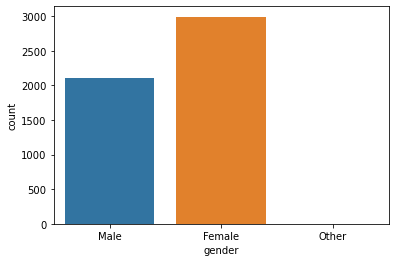

In [163]:
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

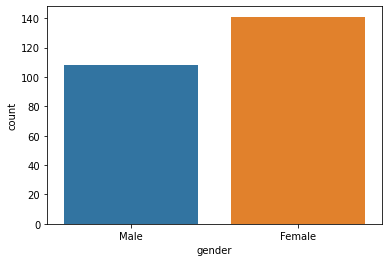

In [164]:
strokes=df[df['stroke']==1]
sns.countplot(x='gender',data=strokes)

In [165]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [166]:
strokes['gender'].value_counts()

Female    141
Male      108
Name: gender, dtype: int64

In [167]:
(2994*100)/(2994+2115)

58.60246623605402

In [168]:
(141*100)/(141+108)

56.626506024096386

# Female has less chances of getting strokes than man

# Effect of Married on Strokes

In [169]:
df[['gender','ever_married','stroke']].value_counts()

gender  ever_married  stroke
Female  Yes           0         1881
Male    Yes           0         1252
Female  No            0          972
Male    No            0          755
Female  Yes           1          120
Male    Yes           1          100
Female  No            1           21
Male    No            1            8
Other   No            0            1
dtype: int64

In [170]:
married_stroke=df[df['ever_married']=='Yes'][df['stroke']==1]
married=df[df['ever_married']=='Yes']

In [171]:
married_stroke[['gender','ever_married','stroke']].value_counts()

gender  ever_married  stroke
Female  Yes           1         120
Male    Yes           1         100
dtype: int64

In [172]:
married['gender'].value_counts()

Female    2001
Male      1352
Name: gender, dtype: int64

In [173]:
married_man_total=(1352*100)/(2001+1352)

In [174]:
married_man_stroke=(100*100)/(100+120)

In [175]:
married_man_stroke-married_man_total

5.132445842257951

# Married man has more likely to have stroke than married woman

In [176]:
unmarried_stroke=df[df['ever_married']=='No'][df['stroke']==1]
unmarried=df[df['ever_married']=='No']

In [177]:
unmarried_stroke[['gender','ever_married','stroke']].value_counts()

gender  ever_married  stroke
Female  No            1         21
Male    No            1          8
dtype: int64

In [178]:
unmarried['gender'].value_counts()

Female    993
Male      763
Other       1
Name: gender, dtype: int64

In [179]:
unmarried_man_total=(763*100)/(993+763)

In [180]:
unmarried_woman_total=(993*100)/(993+763)
unmarried_woman_total

56.54897494305239

In [181]:
unmarried_woman_stroke=(21*100)/(21+8)
unmarried_woman_stroke

72.41379310344827

In [182]:
unmarried_woman_stroke-unmarried_woman_total

15.864818160395878

In [183]:
unmarried_man_total

43.45102505694761

In [184]:
unmarried_man_stroke=(8*100)/(21+8)
unmarried_man_stroke

27.586206896551722

In [185]:
unmarried_man_stroke-unmarried_man_total

-15.864818160395885

In [186]:
unmarried_man_stroke-unmarried_man_total

-15.864818160395885

# Unmarried man has less chance of stroke than unmarried woman

# Marriage Increase the chance of Stroke in Man while decrease the chance of strokes in woman

* Unnmarried man has less likely to get stroke than married man

In [187]:
strokes[['gender','ever_married','stroke']].value_counts()

gender  ever_married  stroke
Female  Yes           1         120
Male    Yes           1         100
Female  No            1          21
Male    No            1           8
dtype: int64

In [244]:
#importing library
import numpy as np
import pandas as pd
#train_test_split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
#tree based model
from sklearn.tree import DecisionTreeClassifier
#Support Vector Machine
from sklearn.svm import LinearSVC,SVC
#neural based model
from sklearn.neural_network import MLPClassifier
#ensemble method
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
#lightgbm
from lightgbm import LGBMClassifier
#catboost
from catboost import CatBoostClassifier
#for checking the accuracy of the dataset
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings(action='ignore')
#visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [245]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Getting Information about the dataset

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [247]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [248]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [249]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [250]:
def preprocess_input(df):
    df=df.copy()
    #dropping the id columns 
    df=df.drop('id',axis=1)
    
    df['ever_married']=df['ever_married'].replace({'Yes':1,'No':0})
    df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})
    onehot_columns=['gender','work_type','smoking_status']
    for column in onehot_columns:
        df=onehot_encode(df,column)
    y=df['stroke']
    x=df.drop('stroke',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    imputer=KNNImputer()
    imputer.fit(x_train)
    x_train=pd.DataFrame(imputer.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(imputer.transform(x_test),columns=x_test.columns)
    
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    
    
    
    
    
    return x_train,x_test,y_train,y_test

In [251]:
x_train,x_test,y_train,y_test=preprocess_input(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3577, 19)
(1533, 19)
(3577,)
(1533,)


In [252]:
x_train.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [253]:
models={'Logistic Regression':LogisticRegression(),
       'K-Nearest Neighbors':KNeighborsClassifier(),
       'Decision Tree':DecisionTreeClassifier(),
       'Support Vector Machine(Linear Kernel)':LinearSVC(),
       'Neural Network':MLPClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boosting':GradientBoostingClassifier(),
       'XGBoost':XGBClassifier(eval_metrics='mlogloss'),
       'LightGBM':LGBMClassifier(),
       'CatBoost':CatBoostClassifier()}


In [254]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name)
    print(model.score(x_test,y_test))

Logistic Regression
0.9549902152641878
K-Nearest Neighbors
0.9504240052185258
Decision Tree
0.9041095890410958
Support Vector Machine(Linear Kernel)
0.9549902152641878
Neural Network
0.9471624266144814
Random Forest
0.9530332681017613
Gradient Boosting
0.949119373776908
[06:41:32] WARNING: ../src/learner.cc:627: 
Parameters: { "eval_metrics" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost
0.9367253750815394
LightGBM
0.9445531637312459
Learning rate set to 0.017754
0:	learn: 0.6631863	total: 1.9ms	remaining: 1.9s
1:	learn: 0.6409914	total: 3.74ms	remaining: 1.86s
2:	learn: 0.6198228	total: 5.72ms	remaining: 1.9s
3:	learn: 0.6000625	total: 6.87ms	remaining: 1.71s
4:	learn: 0.5802541	total: 8.73ms	remaining: 1.74s
5:	learn: 0.5605686	total: 11

# Handling Class Imbalance with OverSampling

In [255]:
oversampled_data=pd.concat([x_train,y_train],axis=1).copy()
num_samples=y_train.value_counts()[0]-y_train.value_counts()[1]
new_samples=oversampled_data.query('stroke==1').sample(num_samples,replace=True,random_state=1)
oversampled_data=pd.concat([oversampled_data,new_samples],axis=0).sample(frac=1.0,random_state=1).reset_index(drop=True)


In [257]:
oversampled_data=oversampled_data.dropna().reset_index(drop=True)

In [259]:
oversampled_data['stroke'].value_counts()

1.0    3397
0.0    2289
Name: stroke, dtype: int64

In [260]:
y=oversampled_data['stroke']
x=oversampled_data.drop('stroke',axis=1)

In [263]:
sampled_xtrain,sampled_xtest,sampled_ytrain,sampled_ytest=train_test_split(x,y,train_size=0.7,random_state=1)

In [266]:
for name,model in models.items():
    model.fit(sampled_xtrain,sampled_ytrain)
    print(name)
    print(model.score(sampled_xtest,sampled_ytest))
    print(model.score(x_test,y_test))

Logistic Regression
0.5943728018757327
0.14220482713633398
K-Nearest Neighbors
0.8821805392731535
0.7012393998695369
Decision Tree
0.9613130128956624
0.8597521200260926
Support Vector Machine(Linear Kernel)
0.5978898007033998
0.1258969341161122
Neural Network
0.8388042203985931
0.6477495107632094
Random Forest
0.9953106682297772
0.9373776908023483
Gradient Boosting
0.7848769050410317
0.482061317677756
[06:49:37] WARNING: ../src/learner.cc:627: 
Parameters: { "eval_metrics" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost
0.9759671746776084
0.8851924331376386
LightGBM
0.9648300117233294
0.8454011741682974
Learning rate set to 0.018582
0:	learn: 0.6894315	total: 3.04ms	remaining: 3.04s
1:	learn: 0.6880291	total: 5.6ms	remaining: 2.8s
2:	learn:

* Random Forest is the best Performing Model with Class Imbalance

In [240]:
x_train.isna().sum()

age                               786
hypertension                      786
heart_disease                     786
ever_married                      786
Residence_type                    786
avg_glucose_level                 786
bmi                               786
gender_Female                     786
gender_Male                       786
gender_Other                      786
work_type_Govt_job                786
work_type_Never_worked            786
work_type_Private                 786
work_type_Self-employed           786
work_type_children                786
smoking_status_Unknown            786
smoking_status_formerly smoked    786
smoking_status_never smoked       786
smoking_status_smokes             786
dtype: int64

1.0    3416
0.0    3416
Name: stroke, dtype: int64

In [236]:
y_train=oversampled_data['stroke']
x_train=oversampled_data.drop('stroke',axis=1)

In [237]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5568, 19)
(2370, 19)
(5568,)
(2370,)


In [238]:
x_train.isna().sum().sum()

14934

In [239]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name)
    print(model.score(x_test,y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Checking for Null value in df data

In [ ]:
df.isna().sum()

Checking the Unique value in each object columns

In [ ]:
{column:list(df[column].unique()) for column in df.columns if df[column].dtypes=='object'}

In [217]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [220]:
100-(249*100)/(249+4861)

95.12720156555773

Self Employed are more likely to get stroke are compared to government and private employees